In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../')

from src.training.caseci import *
from src.explainers import *
from src.timelimit import *
from src.explainers import *

pd.set_option('display.max_columns', 500)

import tensorflow as tf

## Get a model

In [2]:
case = CaseCI()

In [3]:
%%capture --no-display
case.train_model()

In [4]:
case.save_pipe(1, 'case_mean_imp')

 ROC AUC train :  0.6738824367934839 
 ROC AUC val :  0.6408452273092748 
 ROC AUC test :  0.6412330366802789 

Precision test :  0.8477747144545097
Recall test :  0.7040641099026903
F-1 test :  0.7692651329014966


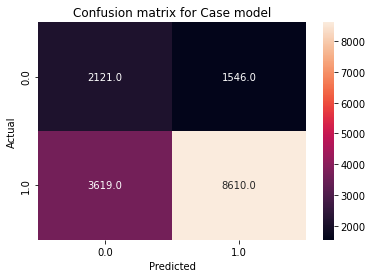

Predicted   0.0   1.0
Actual               
0.0        2121  1546
1.0        3619  8610


In [6]:
case.print_metrics()

## Dataset 

In [8]:
case.data.shape

(76636, 87)

In [9]:
case.data.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target,train_flag
0,0.0,1.0,0.148125,0.12,0.250000,0.019608,0.75,0.750000,0.008264,0.214286,0.0,0.157895,0.771429,0.190110,0.403239,0.123077,0.000000,0.436173,0.130890,0.04,0.118280,0.207464,0.219512,0.000000,0.025385,0.0,0.153333,0.25,0.0,0.045517,0.000000,1.0,0.27,0.000000,0.000000,0.000000,0.028446,0.67,0.003722,0.021081,0.365854,0.107143,0.027559,0.136027,0.058824,0.189509,0.434938,0.044199,0.066719,0.013793,0.000000,0.266667,0.250,0.733333,0.118812,0.000000,0.534915,1.0,0.000000,0.103954,0.000000,0.08,0.400571,0.034188,0.0,0.348837,0.000000,1.0,0.378709,0.471278,0.00000,0.049689,0.041731,0.508301,0.000000,0.000000,0.0,0.651163,0.00,0.063875,0.000000,0.000000,0.000000,0.0,0.662129,1.0,1
1,0.2,1.0,0.088814,0.00,0.428571,0.000000,1.00,0.571429,0.161157,0.571429,0.0,0.315789,0.592593,0.381684,0.053849,0.169231,0.000000,0.856015,0.193717,0.24,0.215054,0.350465,0.414634,0.000000,0.076923,0.0,0.325022,0.41,0.0,0.121378,0.000000,1.0,0.83,0.000000,0.000000,0.000000,0.181619,0.44,0.011278,0.032925,0.512195,0.678571,0.192913,0.060289,0.107843,0.245347,0.210203,0.154696,0.545538,0.059120,0.000000,0.743590,0.250,0.256410,0.742574,0.454545,0.441253,1.0,0.000000,0.078556,0.000000,0.08,0.488359,0.495726,0.0,0.709419,0.000000,1.0,0.269102,0.471278,0.00000,0.037267,0.024730,0.298106,0.000000,0.000000,0.0,0.290581,0.25,0.040619,0.000000,0.235294,0.157303,0.0,0.662129,1.0,1
2,0.0,1.0,0.338045,0.28,0.826087,0.019608,0.00,0.173913,0.020661,0.142857,0.0,0.368421,0.727273,0.551532,0.028223,0.092308,0.000000,0.662558,0.099476,0.38,0.193548,0.479643,0.487805,0.000000,0.051538,0.0,0.265455,0.75,0.0,0.121378,0.004751,1.0,0.52,0.000000,0.006623,0.000000,0.146608,0.25,0.007556,0.063520,0.207317,0.357143,0.031496,0.055478,0.039216,0.324873,0.357704,0.127072,0.133438,0.072864,0.000000,0.512821,0.000,0.461538,0.356436,1.000000,0.673727,1.0,0.000000,0.057089,0.000000,0.00,0.285102,0.170940,0.0,0.539192,0.025641,1.0,0.269628,0.545354,0.00000,0.029503,0.024730,0.377483,0.000000,0.000000,0.0,0.456057,0.00,0.040776,0.000000,0.000000,0.000000,0.0,0.662129,0.0,1
3,0.2,1.0,0.291026,0.00,0.714286,0.019608,1.00,0.285714,0.000000,0.071429,0.0,0.105263,1.000000,0.181186,0.054456,0.000000,0.333333,0.931291,0.125654,0.10,0.064516,0.258796,0.317073,0.230068,0.025385,0.0,0.213333,1.00,0.0,0.091033,0.000000,1.0,0.18,0.000000,0.000000,0.191675,0.218818,0.00,0.007556,0.000000,0.182927,0.035714,0.003937,0.001774,0.019608,0.035533,0.011633,0.038674,0.029119,0.064447,0.278273,0.250000,0.000,0.750000,0.049505,0.000000,0.000000,1.0,0.007808,0.029098,0.664415,0.00,0.000000,0.017094,0.0,0.487805,0.000000,1.0,0.000000,0.471278,0.23049,0.063665,0.068006,0.023635,0.728987,0.094765,0.0,0.512195,0.00,0.000000,0.572306,0.000000,0.000000,0.0,0.662129,1.0,1
4,0.2,1.0,0.112170,0.00,0.000000,0.019608,0.25,0.000000,0.004132,0.000000,0.0,0.157895,0.966667,0.265745,0.029672,0.015385,0.000000,0.423228,0.219895,0.00,0.118280,0.228198,0.292683,0.000000,0.076923,0.0,0.266667,0.80,1.0,0.106205,0.086687,1.0,0.08,0.027778,0.092715,0.000000,0.282276,0.20,0.026277,0.005722,0.548780,0.321429,0.000000,0.089758,0.000000,0.255499,0.566178,0.002762,0.167906,0.081196,0.000000,0.480000,0.375,0.440000,0.217822,0.000000,0.864041,1.0,0.000000,0.062542,0.000000,0.00,0.098104,0.102564,0.0,0.445820,0.080000,1.0,0.110432,0.471278,0.00000,0.041925,0.044822,0.557493,0.000000,0.000000,0.0,0.467492,0.25,0.044626,0.000000,0.000000,0.000000,0.0,0.662129,1.0,1


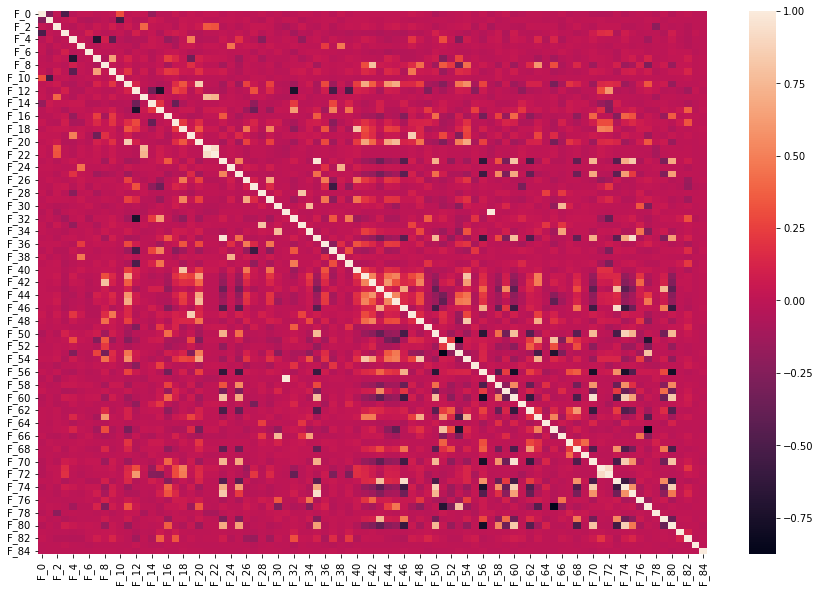

In [10]:
plt.subplots(figsize=(15, 10))
sns.heatmap(case.data.drop(columns=['target','train_flag']).corr());
# plt.title('Correlations between features in a Bank Marketing Dataset');

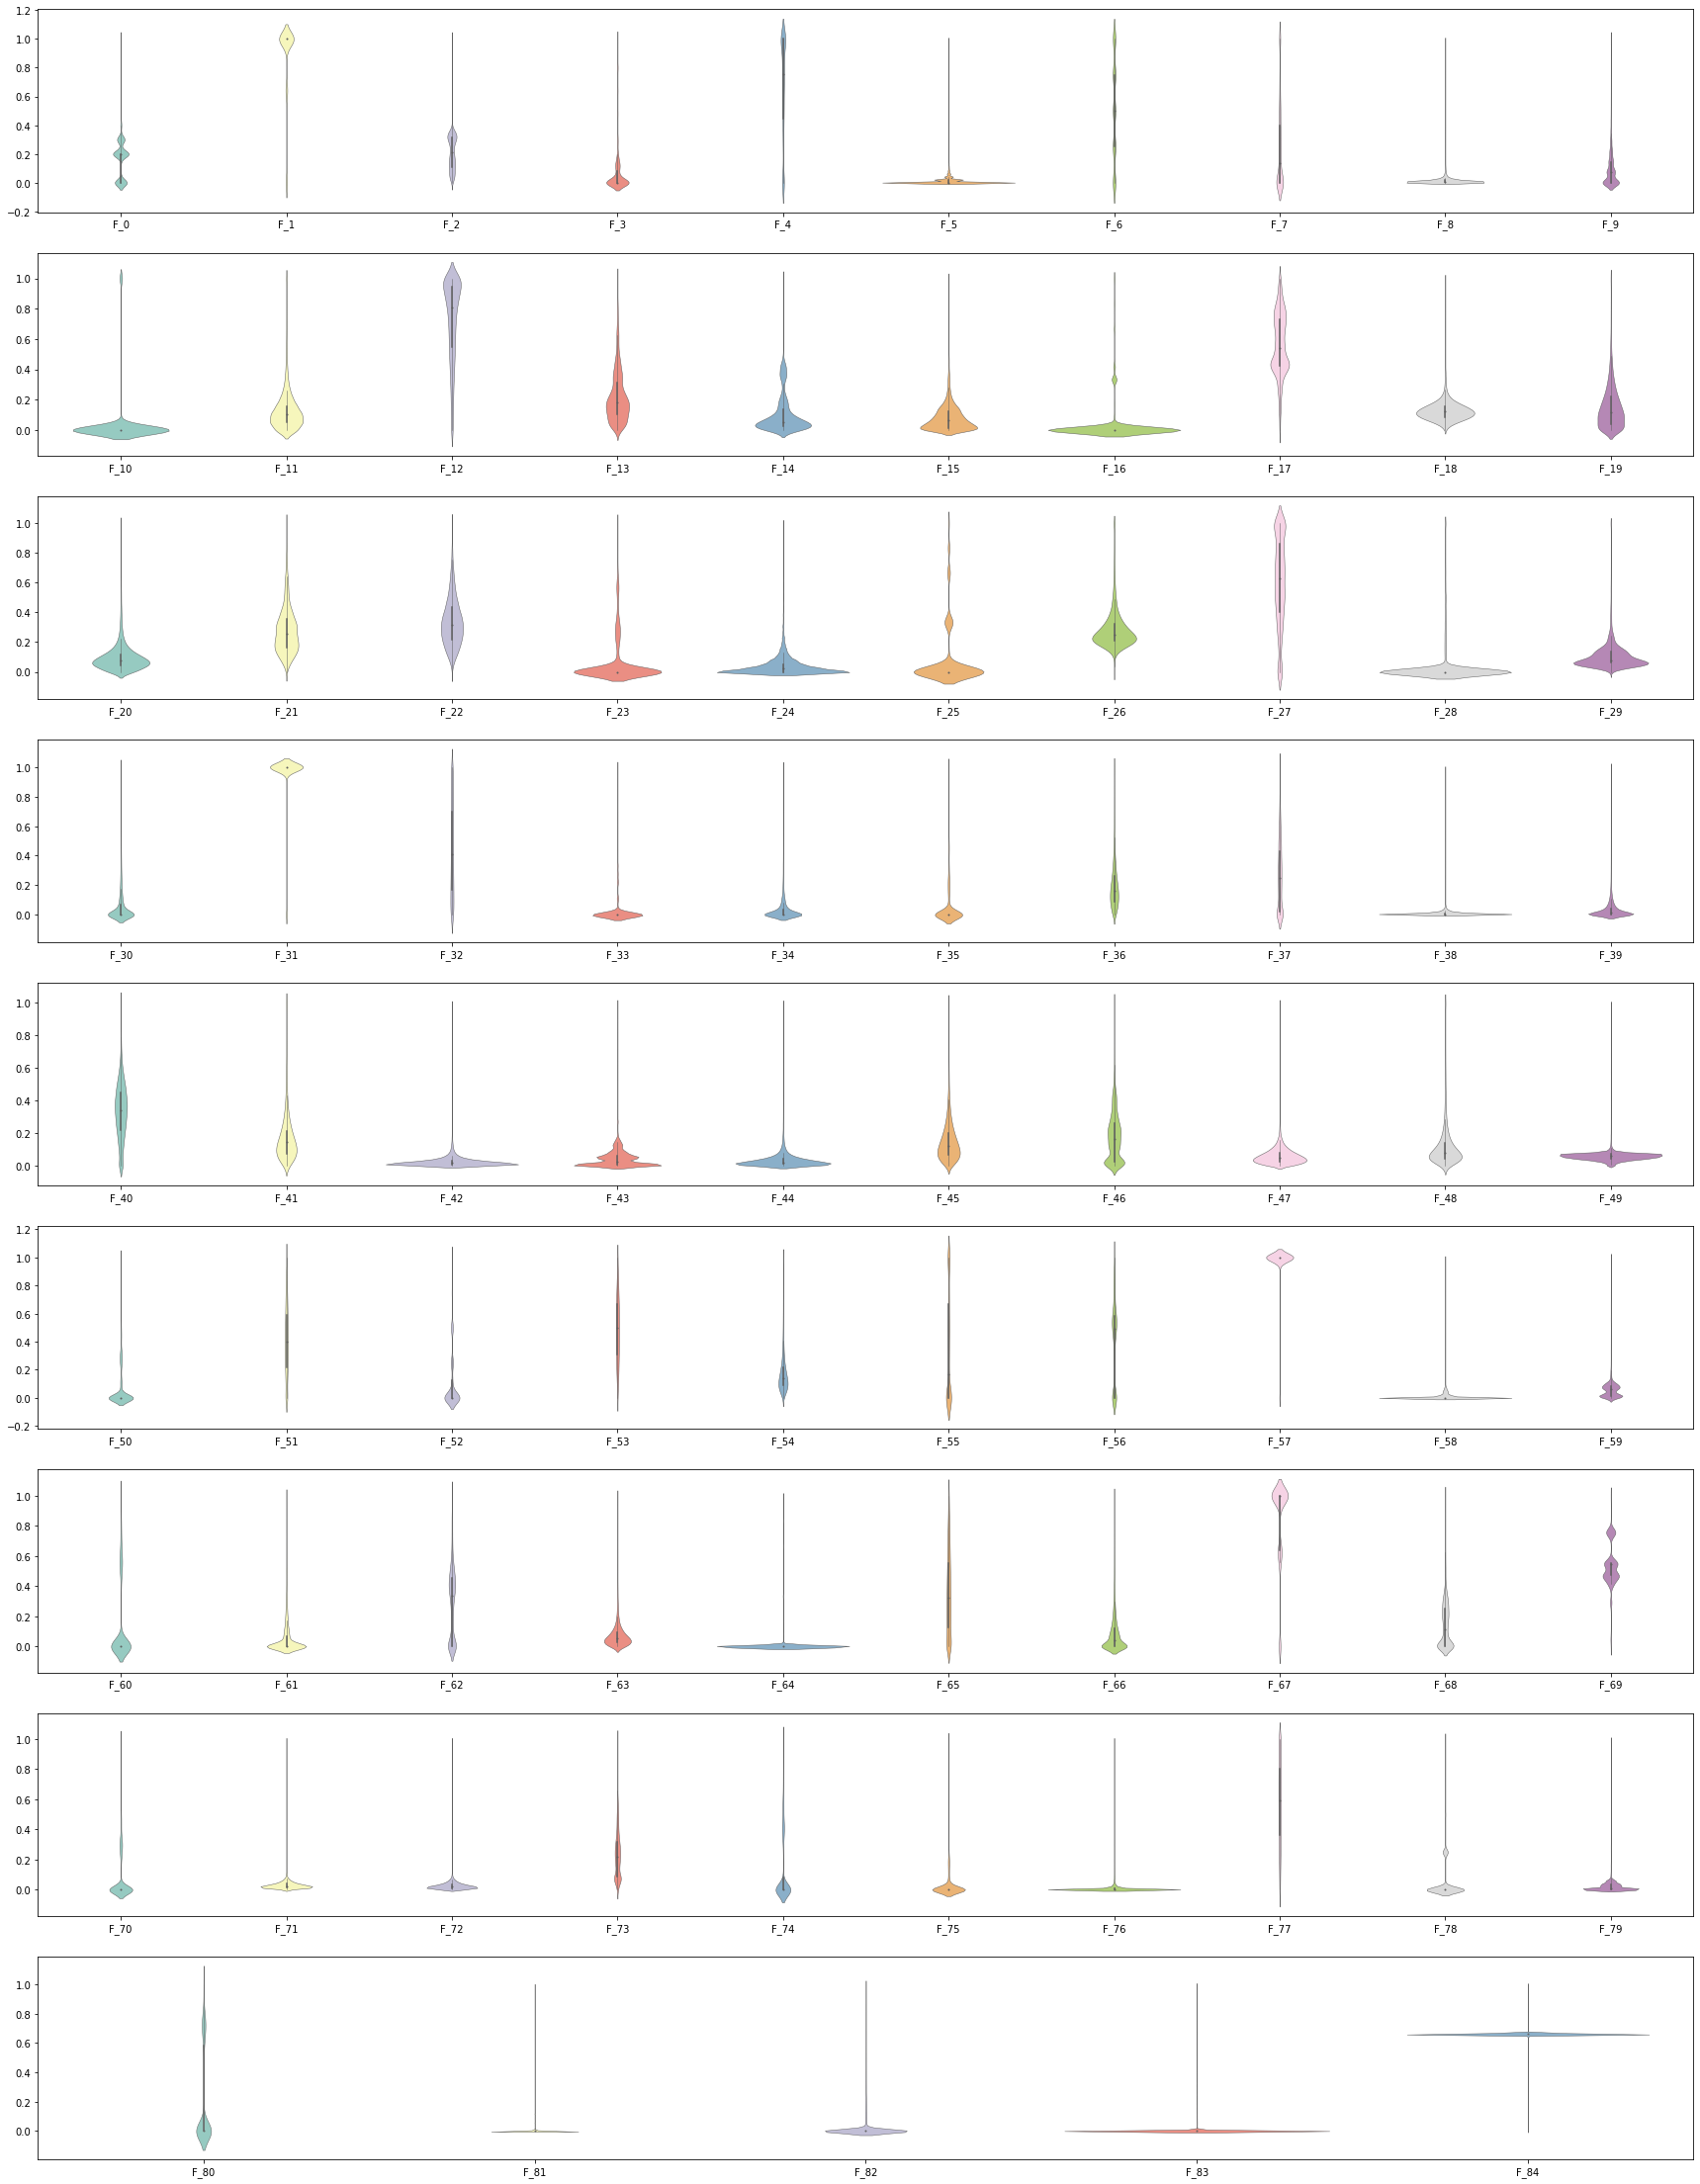

In [11]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
names = case.names
fig, ax = plt.subplots(len(list(chunks(names,10))), 1, figsize=(30,40))
for i, s in enumerate(list(chunks(names,10))):
    df = case.data.drop(columns=['train_flag']).loc[:,s]
    sns.violinplot(data=df, palette="Set3", bw=.2, linewidth=.5, ax=ax[i]);

In [12]:
1-case.data.target.mean()

0.22689075630252098

## Changeable features

1.	Общее количество сделок, заключенных с организацией на текущий день. С ростом количества открытых сделок на одного клиента вероятность отказа снижается на 10%. Формулировка задачи: «Проверь по своим клиентам соблюдение контактной политики. Старайся оперативно реагировать на потребности клиента». Выводим, если менее 5 открытых сделок на одного клиента
F_5 (PDP-plot)
2.	Доля завершенных звонков среди всех активностей за 3 дня. С ростом доли звонков среди всех активностей вероятность отказа растет на 1%. «Старайся поддерживать очный контакт с клиентами». Выводим, если более 0.9 доля звонков.
F_12 (PDP-plot)
3.	Среднее количество уникальных продуктов, предложенных клиенту за 3 дня. С ростом количества уникальных предложенных продуктов вероятность отказа растет на 2%. «Старайся точно идентифицировать потребности клиента и не предлагать новые продукты без необходимости». Выводим, если более 4 количество уникальных предложенных продуктов.
F_24 (PDP-plot)
4.	Количество уникальных продуктов, предложенных клиентам за 3 дня. С ростом числа уникальных предложенных продуктов у клиента вероятность отказа растет на 0.9%. «Старайся не предлагать большой ряд продуктов, уточни потребность клиента». Выводим, если более 15 уникальных предложенных клиентам продуктов.
F_18 (PDP-plot)
5.	Среднее количество завершенных встреч и завершенных звонков за 3 дня. Если совершать встречи, вероятность отказа снижается на 0.4%. «Старайся поддерживать очный контакт с клиентом». Выводим, если нет встреч и есть звонки за последние 3 дня.
F_15, F_72 (PDP-plot)



## DiCE Report

### Generate counterfactuals for a sample n=2000 using only changeable features, without custom range

In [54]:
features_to_vary = ['F_12', 'F_24', 'F_18', 'F_15', 'F_72']

In [55]:
dice = DiCeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary, 
                  custom_range=False)
dice.create_explainer(method='random')

None


In [56]:
# example for one instance
# dice.get_cf(7377, printout=True)

In [57]:
%%capture --no-display
dice.evaluate_dataset(n=2000, save=True, 
                      name='case_dice_cf_2000_no_custom_range')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [70]:
dice.print_metrics()

63.89% of instances of undesired class in the dataset
2000 instances of undesired class analyzed
1.45% of successfull explanations, 29 instances
3.2% of programming package errors
95.35% of cases, where no CFs could be found by DiCE
0.4% of additional potential successes (model quality adjusted)
8 additional potential successes (model quality adjusted)
147 instances with recommended actions (extrapolated to the whole dataset)
40 additional successes in a test set  (model quality adjusted)

In 71.03% cases 2 features were changes
In 17.24% cases 3 features were changes
In 11.72% cases 1 features were changes


How dice changes features:

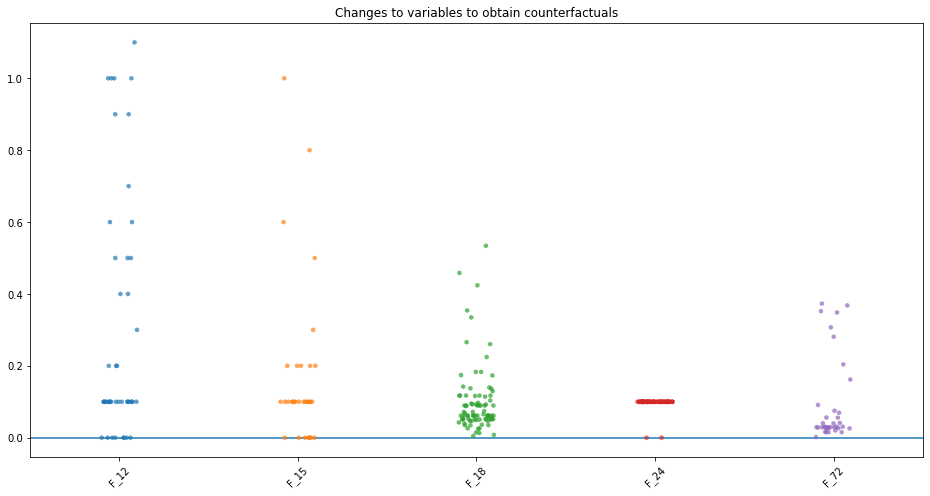

In [59]:
dice.plot_diffs(16,8)

In [60]:
dice.cfs.keys()

dict_keys([10814, 10234, 15681, 6622, 13270, 12888, 1449, 4728, 13112, 1583, 1004, 1975, 10184, 4839, 167, 1125, 14101, 4103, 15243, 11354, 8379, 6299, 801, 7341, 4832, 8406, 1742, 1702])

### Generate counterfactuals for a sample n=2000 using only changeable features with custom range

In [61]:
dice = DiCeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary, 
                  custom_range=True)
dice.create_explainer(method='random')

{'F_12': [0.166666665, 1.0], 'F_24': [0.0, 0.1538461538461538], 'F_18': [0.0418848167539266, 0.225130890052356], 'F_15': [0.0, 0.2307692307337278], 'F_72': [0.0030911901235998, 0.0649149922710214]}


In [62]:
%%capture --no-display
dice.evaluate_dataset(n=2000, save=True, 
                      name='case_dice_cf_2000_custom_range')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [71]:
dice.print_metrics()

63.89% of instances of undesired class in the dataset
2000 instances of undesired class analyzed
1.45% of successfull explanations, 29 instances
3.2% of programming package errors
95.35% of cases, where no CFs could be found by DiCE
0.4% of additional potential successes (model quality adjusted)
8 additional potential successes (model quality adjusted)
147 instances with recommended actions (extrapolated to the whole dataset)
40 additional successes in a test set  (model quality adjusted)

In 71.03% cases 2 features were changes
In 17.24% cases 3 features were changes
In 11.72% cases 1 features were changes


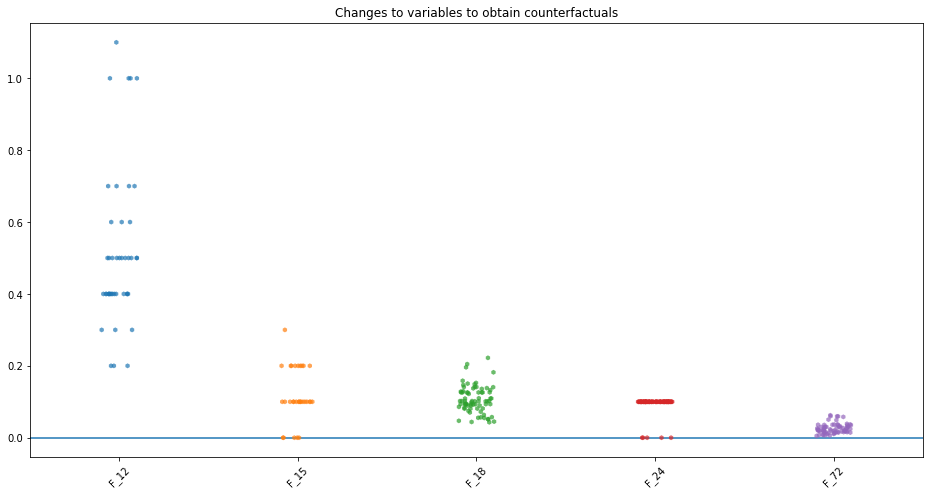

In [64]:
dice.plot_diffs(16,8)

In [65]:
dice.cfs.keys()

dict_keys([10814, 10234, 15681, 6622, 13270, 12888, 1449, 4728, 12459, 13112, 1583, 1004, 1975, 10184, 4839, 167, 1125, 14101, 4103, 15243, 11354, 8379, 6299, 801, 7341, 4832, 8406, 1742, 1702])

### Generate counterfactuals for all test data using only changeable features with custom range

In [101]:
dice = DiCeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary, 
                  custom_range=True)
dice.create_explainer(method='random')

{'F_12': [0.166666665, 1.0], 'F_24': [0.0, 0.1538461538461538], 'F_18': [0.0418848167539266, 0.225130890052356], 'F_15': [0.0, 0.2307692307337278], 'F_72': [0.0030911901235998, 0.0649149922710214]}


In [ ]:
%%capture --no-display
dice.evaluate_dataset(n=1, save=True, 
                      name='case_dice_cf_2000_custom_range')

  0%|          | 0/10156 [00:00<?, ?it/s]

In [ ]:
dice.print_metrics()

In [ ]:
dice.plot_diffs(16,8)

### Generate counterfactuals for all test data using only changeable features with custom range

In [ ]:
dice2 = DiCeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary, 
                  custom_range=False)
dice2.create_explainer(method='random')

In [ ]:
%%capture --no-display
dice2.evaluate_dataset(n=1, save=True, 
                      name='case_dice_cf_2000_custom_range')

In [ ]:
dice2.print_metrics()

In [ ]:
dice2.plot_diffs(16,8)

### Generate counterfactuals for all test data using all features with custom range

In [97]:
dice3 = DiCeReport(case, desired_class=0, 
                  features_to_vary=list(case.X_train.columns), 
                  custom_range=True)
dice3.create_explainer(method='random')

{'F_0': [0.0, 0.3], 'F_1': [0.0, 1.0], 'F_2': [0.0322679778733866, 0.3583282114320835], 'F_3': [0.0, 0.28], 'F_4': [0.0, 1.0], 'F_5': [0.0, 0.0588235294117647], 'F_6': [0.0, 1.0], 'F_7': [0.0, 1.0], 'F_8': [0.0, 0.04318181818180609], 'F_9': [0.0, 0.3035714285714285], 'F_10': [0.0, 0.0], 'F_11': [0.0, 0.3684210526315789], 'F_12': [0.166666665, 1.0], 'F_13': [0.0232609172701338, 0.5495574573915587], 'F_14': [0.0032938879478369, 0.3932493594317515], 'F_15': [0.0, 0.2307692307337278], 'F_16': [0.0, 0.3333333333333333], 'F_17': [0.2274145776162029, 0.8939400624141511], 'F_18': [0.0418848167539266, 0.225130890052356], 'F_19': [0.0, 0.42], 'F_20': [0.0, 0.2688172041935484], 'F_21': [0.0818044734858004, 0.579885021362151], 'F_22': [0.1219512195121951, 0.6341463414634148], 'F_23': [0.0, 0.40143497405252376], 'F_24': [0.0, 0.1538461538461538], 'F_25': [0.0, 0.6666666666666666], 'F_26': [0.15855974016342386, 0.525168254610067], 'F_27': [0.0, 1.0], 'F_28': [0.0, 0.2272727272727272], 'F_29': [0.030

In [100]:
%%capture --no-display
dice3.evaluate_dataset(n=1000, save=True, 
                      name='case_dice_cf_all_all_fts_custom_range')

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [90]:
dice3.print_metrics() #843

63.89% of instances of undesired class in the dataset
10156 instances of undesired class analyzed
0.99% of successfull explanations, 101 instances
3.16% of programming package errors
95.84% of cases, where no CFs could be found by DiCE
0.31% of additional potential successes (model quality adjusted)
31 additional potential successes (model quality adjusted)
101 instances with recommended actions (extrapolated to the whole dataset)
31 additional successes in a test set  (model quality adjusted)

In 80.4% cases 2 features were changes
In 10.69% cases 1 features were changes
In 6.93% cases 3 features were changes
In 1.98% cases 4 features were changes


In [ ]:
dice3.plot_diffs(16,8)

## LimeReport

  0%|          | 0/68 [00:00<?, ?it/s]

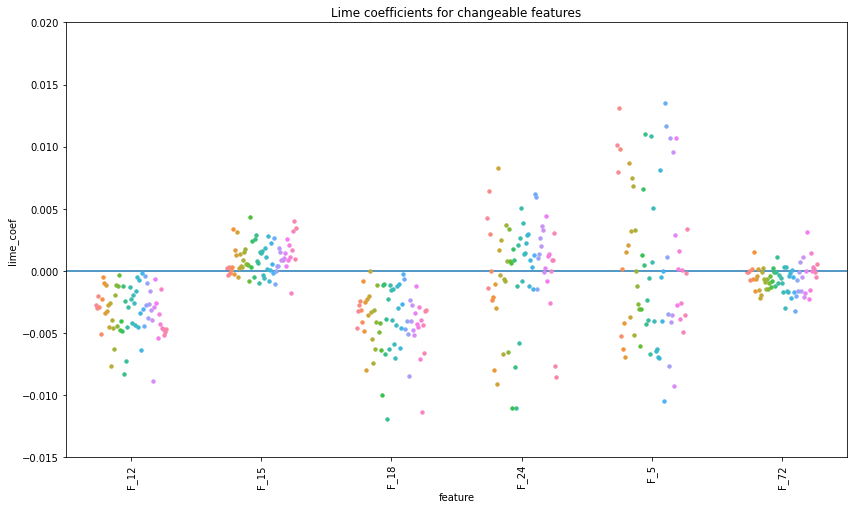

In [128]:
lime = LimeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary)
lime.create_explainer()
lime.evaluate_dataset(dice.cfs)
lime.plot_coefs(-0.015,0.02)

We can see that several features have lime coefficients with different sign for the same instances, means are very close to zero. 

At the same time, for many coefficients are negative (especially for F_18 and F_12), and it doesn't support the DiCE decision to increase the values of this features.

## SLIME - try Stabilized LIME implementation (KDD 2021)

  0%|          | 0/68 [00:00<?, ?it/s]

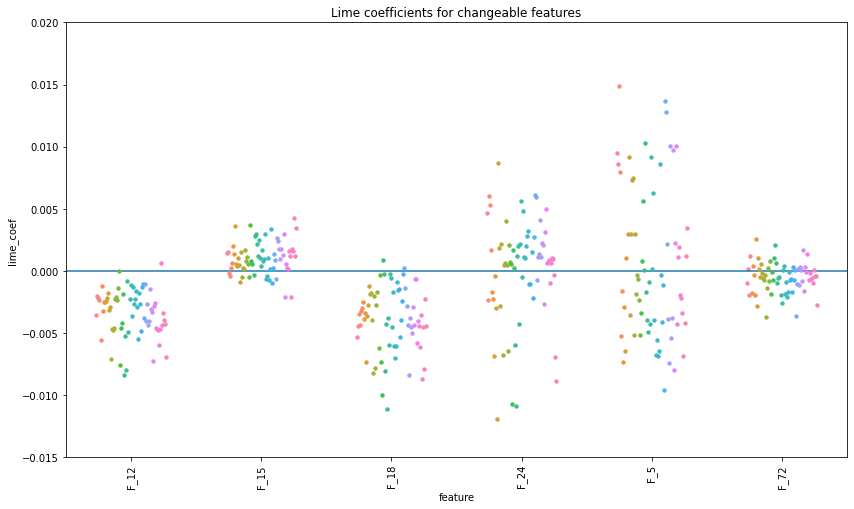

In [129]:
slime = LimeReport(case, desired_class=0, slime=True, 
                  features_to_vary=features_to_vary)
slime.create_explainer()
slime.evaluate_dataset(dice.cfs)
slime.plot_coefs(-0.015,0.02)

Results, in general, are very similar to results of LIME. 

## SHAP

For DiCE subset:

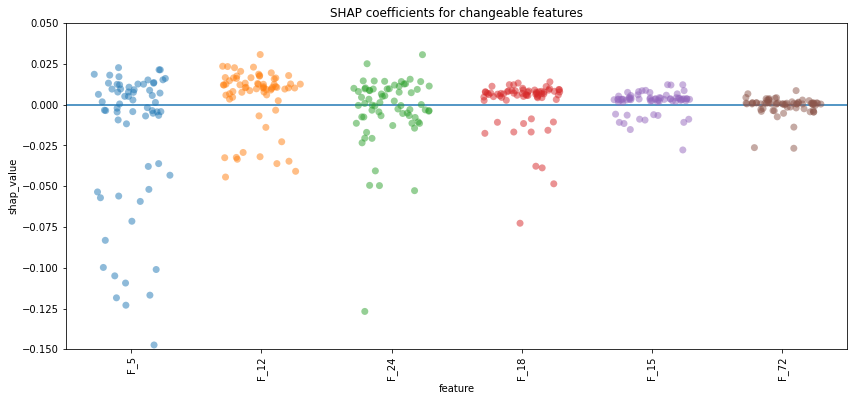

In [130]:
shv = ShapReport(case, desired_class=0, features_to_vary=features_to_vary)
shv.create_explainer()
shv.evaluate_dataset(dice.cfs)
shv.plot_coefs(-0.15,0.05)

## Compare results for DiCE, SHAP and SLIME

General comparison:

In [138]:
comp = Comparator(model=case, dice=dice, sh=shv)
comp.compare_dice_slime()

  0%|          | 0/68 [00:00<?, ?it/s]

Share of cases where  SLIME coefficient sign is equal to DiCE suggestion sign:
         % of equal signs
feature                  
F_12                 0.00
F_18                 0.00
F_72                32.71
F_5                 45.27
F_24                72.48
F_15                80.00

Most common changed by DiCE feature sets are: 
Set [F_5, F_72] changed in 0.22% cases
Set [F_5, F_18] changed in 0.22% cases
Set [F_5, F_24] changed in 0.1% cases
Set [F_5, F_12] changed in 0.06% cases
Set [F_5, F_15] changed in 0.06% cases


In [139]:
comp.compare_dice_shap()

Share of cases where SHAP coefficient sign is equal to DiCE suggestion sign:
         % of equal signs
feature                  
F_24                44.95
F_5                 55.07
F_72                66.36
F_12                70.49
F_15                77.78
F_18                83.05


Instance-level comparison: 

In [140]:
comp.dice.cfs.keys()

dict_keys([3627, 15822, 14302, 7991, 14147, 12095, 14318, 15875, 14533, 13903, 8894, 5826, 13522, 15719, 15775, 9815, 11695, 350, 6885, 15113, 14003, 7760, 8635, 9668, 12445, 5211, 12835, 12631, 9467, 10520, 3859, 13627, 15318, 6265, 6643, 14142, 1454, 12762, 9783, 13908, 13397, 10934, 8792, 12252, 1976, 5640, 14101, 11690, 8497, 4477, 12534, 1098, 10582, 6739, 12085, 298, 12917, 6358, 9248, 12888, 4359, 3337, 13315, 9913, 15208, 4601, 3154, 5104])

Stabilized-LIME coefficient sign for F_5 corresponds with DiCE suggestion
Stabilized-LIME coefficient sign for F_72 doesn't correspond with DiCE suggestion


SHAP coefficient sign for F_5 doesn't correspond with DiCE suggestion
SHAP coefficient sign for F_72 corresponds with DiCE suggestion

Plotting PDP-ICE...

Computing partial dependence plots...


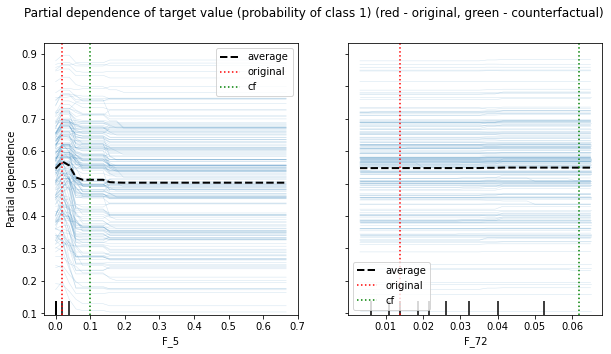

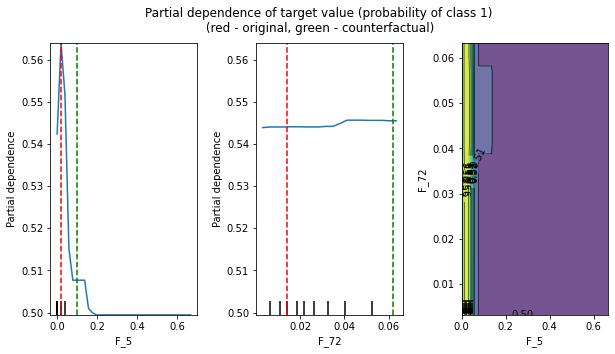

In [141]:
instance_id = 10520
comp.compare_instance(instance_id)

Stabilized-LIME coefficient sign for F_5 doesn't correspond with DiCE suggestion
Stabilized-LIME coefficient sign for F_72 corresponds with DiCE suggestion


SHAP coefficient sign for F_5 corresponds with DiCE suggestion
SHAP coefficient sign for F_72 doesn't correspond with DiCE suggestion

Plotting PDP-ICE...

Computing partial dependence plots...


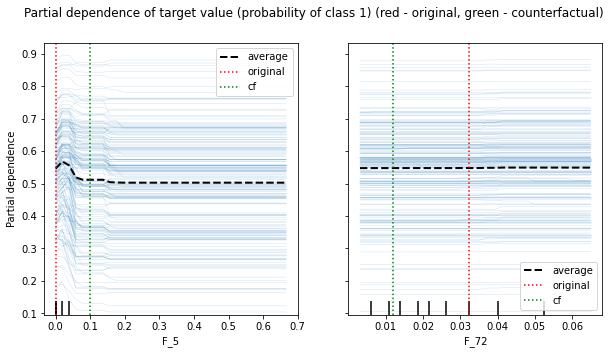

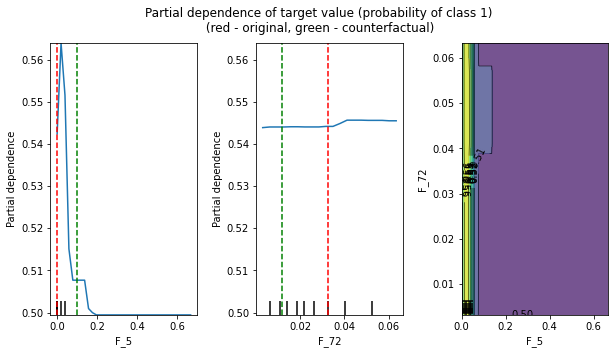

In [143]:
instance_id = 15318
comp.compare_instance(instance_id)

In [145]:
comp.dice.get_cf(15318, printout=True)

100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.59s/it]

Query instance (original outcome : 1)


,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target
0,0.3,1.0,0.307007,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.263158,0.84,0.239704,0.054934,0.061538,0.0,0.39373,0.188482,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.032457,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,1



Diverse Counterfactual set (new outcome: 0.0)


,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target
0,-,-,-,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0037216645990752,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.05797798,-,-,-,-,-,-,-,-,-,-,-,-,0.0
1,-,-,-,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,0.05249356,-,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0037216645990752,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
2,-,-,-,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0037216645990752,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.043527487,-,-,-,-,-,-,-,-,-,-,-,-,0.0
3,-,-,-,-,-,0.2,-,-,-,-,-,-,-,-,-,0.2,-,-,-,-,-,-,-,-,1.0253846153846153,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0037216645990752,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
4,-,-,-,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0037216645990752,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.021064414,-,-,-,-,-,-,-,-,-,-,-,-,0.0


In [147]:
comp.dice.cfs[15318]['cfs']

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target
0,0.3,1.0,0.307007,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.0,0.263158,0.84,0.239704,0.054934,0.061538,0.0,0.39373,0.188482,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.011910,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,0
1,0.3,1.0,0.307007,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.0,0.263158,0.84,0.239704,0.054934,0.061538,0.0,0.39373,0.138543,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.032457,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,0
2,0.3,1.0,0.307007,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.0,0.263158,0.80,0.239704,0.054934,0.061538,0.0,0.39373,0.188482,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.032457,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,0
3,0.3,1.0,0.307007,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.0,0.263158,0.84,0.239704,0.054934,0.061538,0.0,0.39373,0.188482,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.012485,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,0
4,0.3,1.0,0.307007,0.0,0.0,0.1,0.5,0.0,0.0,0.0,0.0,0.263158,0.84,0.239704,0.054934,0.061538,0.0,0.39373,0.188482,0.0,0.16129,0.484544,0.560976,0.0,0.025385,0.0,0.265,0.6,0.0,0.060689,0.0,1.0,0.09,0.0,0.0,0.0,0.188184,0.4,0.003722,0.012179,0.536585,0.142857,0.027559,0.037286,0.078431,0.237225,0.157279,0.0,0.075652,0.059002,0.0,0.0,0.0,1.0,0.118812,0.0,0.478892,1.0,0.0,0.07344,0.0,0.0,0.460422,0.0,0.0,0.0,0.0,1.0,0.052365,0.471278,0.0,0.034161,0.023534,0.197191,0.0,0.0,0.0,1.0,0.0,0.007228,0.0,0.0,0.0,0.0,0.662129,0
